## <center>CMSC 691 Data Science Homework 4 <br/>Name: Himanshu Londhe </center>

In [1]:
import sys,os
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train = np.loadtxt(fname = 'mnist_data.txt',dtype = 'longlong')
y_train = np.loadtxt(fname = 'mnist_labels.txt',dtype = 'longlong')

### Inserting 1s in the labels where the corressponding label is 8 and 0 otherwise

In [3]:
for i in range(len(y_train)):
    if y_train[i] != 8:
        y_train[i] = 0
    else:
        y_train[i] = 1

### Train function without Lambda 

In [4]:
def train():
    w0 = np.zeros((1,784),dtype = 'longlong')  ## weight vector, initilized to all zeros
    for _ in range (0,15):    # 50 epochs
        g = np.zeros((1,784),dtype = 'longlong')  ## vector for the gradient, set to all zeros 
        p = 0    # probility 
        for i in range(len(x_train)):
            error = 0
            p = 1/(1+ np.exp(np.dot(-w0,x_train[i])))   
            error = y_train[i] - p  
            g = ( g + (error*x_train[i]) )
        w0 = w0 + 0.0001 * g 
    return w0 

### Train function with Lambda considered

In [5]:
def trainlambda(L):
    w0 = np.zeros((1,784),dtype = 'longlong')  ## weight vector, initilized to all zeros
    for _ in range (0,20):    # 20 epochs
        g = np.zeros((1,784),dtype = 'longlong')  ## vector for the gradient, set to all zeros 
        p = 0    # probility 
        for i in range(len(x_train)):
            error = 0
            p = 1/(1+ np.exp(np.dot(-w0,x_train[i])))   
            error = y_train[i] - p  
            g = ( g + (error*x_train[i]) ) - (2*L*w0) 
        w0 = w0 + (0.0001 * g)
    return w0

### Functoin to print Accuracy for a model with the returned weight 

In [6]:
def accuracy(wt):
    acc = 0
    for i in range(len(x_train)):
        p2 = 1/(1+ np.exp(np.dot(-wt,x_train[i])))
        if p2 > 0.5:       #if probability is greater than 0.5, set predicted = True(1)
            pred = 1 
        else:
            pred = 0
        if y_train[i] - pred == 0:   # label if it is an 8 is 1, so if label - pred will be 0 and for
            #non 8 instances label is zero and label - pred will be 0  
            acc += 1 
    return (acc/len(x_train)*100)

### Function to print a weight vector 

In [7]:
def printweight(wt):    
    w1 = ((wt - wt.max()) * (1/(wt.min() - wt.max()) * 255)).astype('uint8')
    w1 = w1.reshape(-1)
    w1 = w1.reshape(28,28)
    plt.imshow(w1,interpolation='sinc',cmap='gray')
    plt.show()

### Training set accuracy on the 8-vs-others classification problem

90.49000000000001 %


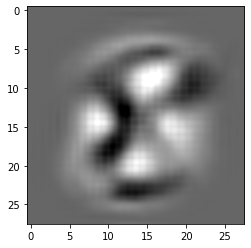

In [8]:
wt = train()
print(accuracy(wt),'%')
printweight(wt)

### <center> Accuracy and details about the weight vector image
#### As we can see, the trained model returns a weight vector and the accuracy is about <strong>90.5%.</strong> <br />The returned weight vector looks like an '8' if you print it. <br/> Our regression model is learning whether  a hand-drawn image is an '8' or not. So, for that our model has learned how an 8 will generally look like. <br/> For every instance, the model calculates the probability of the instance being an '8' or not an '8'. If we have a confidence that the sample is an '8' by probability 50%, we are tagging it as an '8'. <br/> As we fine tune our parameters, and adjust variables, we get a clear picture of the weight vector.

[88.79]


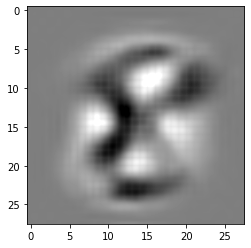

[88.79, 89.24]


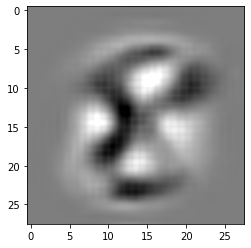

[88.79, 89.24, 89.25]


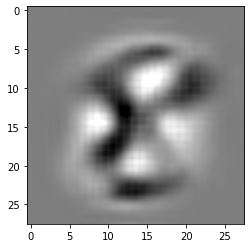

[88.79, 89.24, 89.25, 89.23]


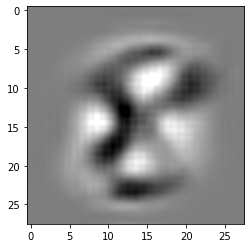

[88.79, 89.24, 89.25, 89.23, 89.92]


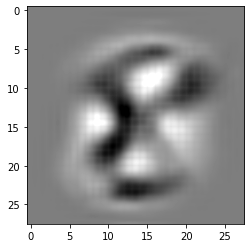

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94]


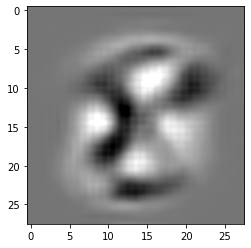

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47]


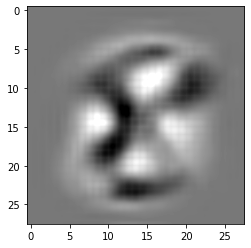

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55]


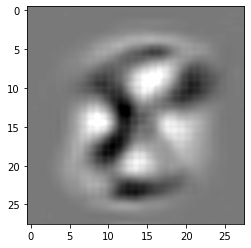

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25]


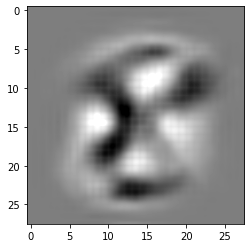

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96]


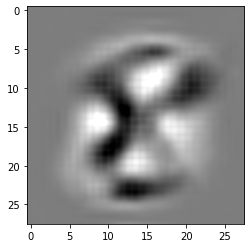

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36]


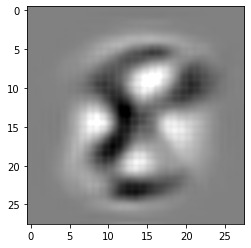

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52]


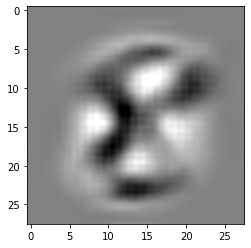

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52, 91.53999999999999]


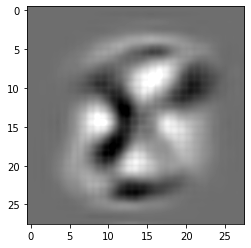

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52, 91.53999999999999, 90.25999999999999]


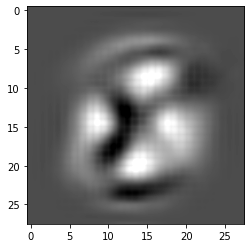

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52, 91.53999999999999, 90.25999999999999, 90.25999999999999]


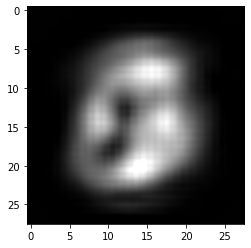

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52, 91.53999999999999, 90.25999999999999, 90.25999999999999, 9.74]


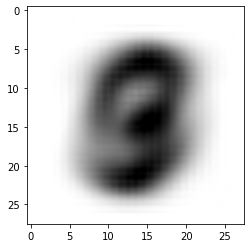

[88.79, 89.24, 89.25, 89.23, 89.92, 92.94, 93.47, 93.55, 93.25, 91.96, 79.36, 86.52, 91.53999999999999, 90.25999999999999, 90.25999999999999, 9.74, 9.74]


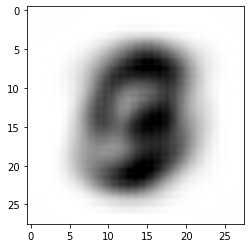

In [ ]:
L = [0,0.00001,0.00003,0.0001,0.0003,0.0009,0.001,0.00101,0.002,0.003,0.01,0.02,0.03,0.1,0.3,1,3,10,30]
     # Lambda values # to experiment upon
acc = []
for l in L:
    wt = 0
    wt = trainlambda(l)
    acc.append(accuracy(wt))
    print(acc)
    printweight(wt)

### Printing Accuracy as a function of Lambda 

In [ ]:
acc
L1 = []
for i in range(len(L)):
    L1.append(str(L[i]))

In [ ]:
plt.plot(L1,acc)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")

### As seen in the above curve,  we can see that as we increase lambda from 0 - 0.0009, we see a gradual increase in the accuracy from ~88% and at  Lambda = 0.001, the accuracy peaks at 93.47%. If we increase it any further, the accuracy dips to lower 80 percents. This is because the Lambda is penalizing the error too much for the mis-classification. Even though as we increase Lambda, our accuracy increases gradually again but we do not see the peak accuracy that we got for L = 0.001. 
### After that point the accuracy stays constant at 90.26% and the value of Lambda doesn't matter. Setting the right value for lambda matters if you want to avoid overfitting. However, choosing this value needs experimentation with various learning rates, epochs and values of lambda. 